# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


On récupère les données. Elles ont été trouvées dans [ce lien](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). 

C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and oceans from 1978 to 2000. I. Global aspects, SIO Reference Series, No. 01-06, Scripps Institution of Oceanography, San Diego, 88 pages, 2001.

In [18]:
data_file = 'monthly_in_situ_co2_mlo.csv'
data = pd.read_csv(data_file, skiprows=61)
data


Yr   Mn      Date         Date       CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200    1958.0411    -99.99      -99.99       -99.99   
3    1958   02     21231    1958.1260    -99.99      -99.99       -99.99   
4    1958   03     21259    1958.2027    315.71      314.43       316.20   
5    1958   04     21290    1958.2877    317.45      315.16       317.30   
6    1958   05     21320    1958.3699    317.51      314.69       317.89   
7    1958   06     21351    1958.4548    -99.99      -99.99       317.27   
8    1958   07     21381    1958.5370    315.87      315.20       315.86   
9    1958   08     21412    1958.6219    314.93      316.22       313.96   
10   1958   09     21443    1958.7068    313.21      316.12       312.43   
11   1958   10     21473    1958.7890    -99.99      -99.99       312.42   
12   1958   11     21504    1958.8740    313.33      315.21       313.60   
13   1958   12     21534    1958.9562    314.67      315.43       314.77   
14   1959   01     21565    1959.0411    315.58      315.52       315.64   
15   1959   02     21596    1959.1260    316.49      315.84       316.30   
16   1959   03     21624    1959.2027    316.65      315.37       316.99   
17   1959   04     21655    1959.2877    317.72      315.41       318.09   
18   1959   05     21685    1959.3699    318.29      315.46       318.68   
19   1959   06     21716    1959.4548    318.15      316.00       318.07   
20   1959   07     21746    1959.5370    316.54      315.87       316.67   
21   1959   08     21777    1959.6219    314.80      316.09       314.80   
22   1959   09     21808    1959.7068    313.84      316.75       313.29   
23   1959   10     21838    1959.7890    313.33      316.35       313.31   
24   1959   11     21869    1959.8740    314.81      316.69       314.53   
25   1959   12     21899    1959.9562    315.58      316.35       315.72   
26   1960   01     21930    1960.0410    316.43      316.37       316.62   
27   1960   02     21961    1960.1257    316.98      316.33       317.30   
28   1960   03     21990    1960.2049    317.58      316.27       318.04   
29   1960   04     22021    1960.2896    319.03      316.70       319.14   
..    ...  ...       ...          ...       ...         ...          ...   
776  2022   07     44757    2022.5370    418.71      417.91       418.94   
777  2022   08     44788    2022.6219    416.75      418.30       416.77   
778  2022   09     44819    2022.7068    415.42      418.91       415.04   
779  2022   10     44849    2022.7890    415.31      418.92       415.15   
780  2022   11     44880    2022.8740    417.03      419.29       416.71   
781  2022   12     44910    2022.9562    418.46      419.38       418.25   
782  2023   01     44941    2023.0411    419.13      419.06       419.45   
783  2023   02     44972    2023.1260    420.33      419.55       420.40   
784  2023   03     45000    2023.2027    420.51      418.97       421.39   
785  2023   04     45031    2023.2877    422.73      419.96       422.89   
786  2023   05     45061    2023.3699    423.78      420.38       423.77   
787  2023   06     45092    2023.4548    423.39      420.81       423.23   
788  2023   07     45122    2023.5370    421.62      420.82       421.73   
789  2023   08     45153    2023.6219    419.56      421.12       419.67   
790  2023   09     45184    2023.7068    418.06      421.56       418.06   
791  2023   10     45214    2023.7890    418.41      422.02       418.28   
792  2023   11     45245    2023.8740    420.11      422.38       419.95   
793  2023   12     45275    2023.9562    421.65      422.57       421.58   
794  2024   01     45306    2024.0410    422.62      422.55       422.85   
795  2024   02     45337    2024.1257    424.34      423.56       423.85   
796  2024   03     45366    2024.2049    425.22      42

Il y a un problème avec les en têtes. On concatene les deux premieres lignes et enleve celle de l'unité.

In [19]:
columns_label = ['Yr', 'Mn', 'Date_excel', 'Date', 'CO2', 'seasonally_adjusted',
       'fit', 'seasonally_adjusted_fit', 'CO2_filled', 'seasonally_adjusted_filled', 'Sta']

data.columns = columns_label
data = data.drop([0, 1]).reset_index().drop('index',axis=1)
data


Yr   Mn Date_excel         Date       CO2 seasonally_adjusted  \
0    1958   01      21200    1958.0411    -99.99              -99.99   
1    1958   02      21231    1958.1260    -99.99              -99.99   
2    1958   03      21259    1958.2027    315.71              314.43   
3    1958   04      21290    1958.2877    317.45              315.16   
4    1958   05      21320    1958.3699    317.51              314.69   
5    1958   06      21351    1958.4548    -99.99              -99.99   
6    1958   07      21381    1958.5370    315.87              315.20   
7    1958   08      21412    1958.6219    314.93              316.22   
8    1958   09      21443    1958.7068    313.21              316.12   
9    1958   10      21473    1958.7890    -99.99              -99.99   
10   1958   11      21504    1958.8740    313.33              315.21   
11   1958   12      21534    1958.9562    314.67              315.43   
12   1959   01      21565    1959.0411    315.58              315.52   
13   1959   02      21596    1959.1260    316.49              315.84   
14   1959   03      21624    1959.2027    316.65              315.37   
15   1959   04      21655    1959.2877    317.72              315.41   
16   1959   05      21685    1959.3699    318.29              315.46   
17   1959   06      21716    1959.4548    318.15              316.00   
18   1959   07      21746    1959.5370    316.54              315.87   
19   1959   08      21777    1959.6219    314.80              316.09   
20   1959   09      21808    1959.7068    313.84              316.75   
21   1959   10      21838    1959.7890    313.33              316.35   
22   1959   11      21869    1959.8740    314.81              316.69   
23   1959   12      21899    1959.9562    315.58              316.35   
24   1960   01      21930    1960.0410    316.43              316.37   
25   1960   02      21961    1960.1257    316.98              316.33   
26   1960   03      21990    1960.2049    317.58              316.27   
27   1960   04      22021    1960.2896    319.03              316.70   
28   1960   05      22051    1960.3716    320.03              317.20   
29   1960   06      22082    1960.4563    319.59              317.45   
..    ...  ...        ...          ...       ...                 ...   
774  2022   07      44757    2022.5370    418.71              417.91   
775  2022   08      44788    2022.6219    416.75              418.30   
776  2022   09      44819    2022.7068    415.42              418.91   
777  2022   10      44849    2022.7890    415.31              418.92   
778  2022   11      44880    2022.8740    417.03              419.29   
779  2022   12      44910    2022.9562    418.46              419.38   
780  2023   01      44941    2023.0411    419.13              419.06   
781  2023   02      44972    2023.1260    420.33              419.55   
782  2023   03      45000    2023.2027    420.51              418.97   
783  2023   04      45031    2023.2877    422.73              419.96   
784  2023   05      45061    2023.3699    423.78              420.38   
785  2023   06      45092    2023.4548    423.39              420.81   
786  2023   07      45122    2023.5370    421.62              420.82   
787  2023   08      45153    2023.6219    419.56              421.12   
788  2023   09      45184    2023.7068    418.06              421.56   
789  2023   10      45214    2023.7890    418.41              422.02   
790  2023   11      45245    2023.8740    420.11              422.38   
791  2023   12      45275    2023.9562    421.65              422.57   
792  2024   01      45306    2024.0410    422.62              422.55   
793  2024   02      45337    2024.1257    424.34              423.56   
794  2024   03      45366    2024.2049    425.22              423.65   
795  2024   04      45397    2024.2896    426.30              423.50   
796  2024   05      45427    2024.3716    426.70              423.29   
797  2024   06      45458    2024.4563    426.6

Les données manquantes dans le fichier de base ont été remplacées par -99.99. Elles ne nous interessent pas. On les enlève de l'analyse.

In [20]:
data = data[data['CO2'].astype(float)>0]
data

Yr   Mn Date_excel         Date       CO2 seasonally_adjusted  \
2    1958   03      21259    1958.2027    315.71              314.43   
3    1958   04      21290    1958.2877    317.45              315.16   
4    1958   05      21320    1958.3699    317.51              314.69   
6    1958   07      21381    1958.5370    315.87              315.20   
7    1958   08      21412    1958.6219    314.93              316.22   
8    1958   09      21443    1958.7068    313.21              316.12   
10   1958   11      21504    1958.8740    313.33              315.21   
11   1958   12      21534    1958.9562    314.67              315.43   
12   1959   01      21565    1959.0411    315.58              315.52   
13   1959   02      21596    1959.1260    316.49              315.84   
14   1959   03      21624    1959.2027    316.65              315.37   
15   1959   04      21655    1959.2877    317.72              315.41   
16   1959   05      21685    1959.3699    318.29              315.46   
17   1959   06      21716    1959.4548    318.15              316.00   
18   1959   07      21746    1959.5370    316.54              315.87   
19   1959   08      21777    1959.6219    314.80              316.09   
20   1959   09      21808    1959.7068    313.84              316.75   
21   1959   10      21838    1959.7890    313.33              316.35   
22   1959   11      21869    1959.8740    314.81              316.69   
23   1959   12      21899    1959.9562    315.58              316.35   
24   1960   01      21930    1960.0410    316.43              316.37   
25   1960   02      21961    1960.1257    316.98              316.33   
26   1960   03      21990    1960.2049    317.58              316.27   
27   1960   04      22021    1960.2896    319.03              316.70   
28   1960   05      22051    1960.3716    320.03              317.20   
29   1960   06      22082    1960.4563    319.59              317.45   
30   1960   07      22112    1960.5383    318.18              317.53   
31   1960   08      22143    1960.6230    315.90              317.23   
32   1960   09      22174    1960.7077    314.17              317.10   
33   1960   10      22204    1960.7896    313.83              316.85   
..    ...  ...        ...          ...       ...                 ...   
771  2022   04      44666    2022.2877    420.01              417.25   
772  2022   05      44696    2022.3699    420.78              417.39   
773  2022   06      44727    2022.4548    420.68              418.10   
774  2022   07      44757    2022.5370    418.71              417.91   
775  2022   08      44788    2022.6219    416.75              418.30   
776  2022   09      44819    2022.7068    415.42              418.91   
777  2022   10      44849    2022.7890    415.31              418.92   
778  2022   11      44880    2022.8740    417.03              419.29   
779  2022   12      44910    2022.9562    418.46              419.38   
780  2023   01      44941    2023.0411    419.13              419.06   
781  2023   02      44972    2023.1260    420.33              419.55   
782  2023   03      45000    2023.2027    420.51              418.97   
783  2023   04      45031    2023.2877    422.73              419.96   
784  2023   05      45061    2023.3699    423.78              420.38   
785  2023   06      45092    2023.4548    423.39              420.81   
786  2023   07      45122    2023.5370    421.62              420.82   
787  2023   08      45153    2023.6219    419.56              421.12   
788  2023   09      45184    2023.7068    418.06              421.56   
789  2023   10      45214    2023.7890    418.41              422.02   
790  2023   11      45245    2023.8740    420.11              422.38   
791  2023   12      45275    2023.9562    421.65              422.57   
792  2024   01      45306    2024.0410    422.62              422.55   
793  2024   02      45337    2024.1257    424.34              423.56   
794  2024   03      45366    2024.2049    425.2

On crée une collonne avec les dates compreensibles par pandas

In [21]:
def convert_to_month_start(year, month):
    return pd.Timestamp(year=year, month=month, day=1)

data.loc[:, 'period'] = [convert_to_month_start(y, m) for y, m in zip(data['Yr'].astype(int), data['Mn'].astype(int))]
data

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Yr   Mn Date_excel         Date       CO2 seasonally_adjusted  \
2    1958   03      21259    1958.2027    315.71              314.43   
3    1958   04      21290    1958.2877    317.45              315.16   
4    1958   05      21320    1958.3699    317.51              314.69   
6    1958   07      21381    1958.5370    315.87              315.20   
7    1958   08      21412    1958.6219    314.93              316.22   
8    1958   09      21443    1958.7068    313.21              316.12   
10   1958   11      21504    1958.8740    313.33              315.21   
11   1958   12      21534    1958.9562    314.67              315.43   
12   1959   01      21565    1959.0411    315.58              315.52   
13   1959   02      21596    1959.1260    316.49              315.84   
14   1959   03      21624    1959.2027    316.65              315.37   
15   1959   04      21655    1959.2877    317.72              315.41   
16   1959   05      21685    1959.3699    318.29              315.46   
17   1959   06      21716    1959.4548    318.15              316.00   
18   1959   07      21746    1959.5370    316.54              315.87   
19   1959   08      21777    1959.6219    314.80              316.09   
20   1959   09      21808    1959.7068    313.84              316.75   
21   1959   10      21838    1959.7890    313.33              316.35   
22   1959   11      21869    1959.8740    314.81              316.69   
23   1959   12      21899    1959.9562    315.58              316.35   
24   1960   01      21930    1960.0410    316.43              316.37   
25   1960   02      21961    1960.1257    316.98              316.33   
26   1960   03      21990    1960.2049    317.58              316.27   
27   1960   04      22021    1960.2896    319.03              316.70   
28   1960   05      22051    1960.3716    320.03              317.20   
29   1960   06      22082    1960.4563    319.59              317.45   
30   1960   07      22112    1960.5383    318.18              317.53   
31   1960   08      22143    1960.6230    315.90              317.23   
32   1960   09      22174    1960.7077    314.17              317.10   
33   1960   10      22204    1960.7896    313.83              316.85   
..    ...  ...        ...          ...       ...                 ...   
771  2022   04      44666    2022.2877    420.01              417.25   
772  2022   05      44696    2022.3699    420.78              417.39   
773  2022   06      44727    2022.4548    420.68              418.10   
774  2022   07      44757    2022.5370    418.71              417.91   
775  2022   08      44788    2022.6219    416.75              418.30   
776  2022   09      44819    2022.7068    415.42              418.91   
777  2022   10      44849    2022.7890    415.31              418.92   
778  2022   11      44880    2022.8740    417.03              419.29   
779  2022   12      44910    2022.9562    418.46              419.38   
780  2023   01      44941    2023.0411    419.13              419.06   
781  2023   02      44972    2023.1260    420.33              419.55   
782  2023   03      45000    2023.2027    420.51              418.97   
783  2023   04      45031    2023.2877    422.73              419.96   
784  2023   05      45061    2023.3699    423.78              420.38   
785  2023   06      45092    2023.4548    423.39              420.81   
786  2023   07      45122    2023.5370    421.62              420.82   
787  2023   08      45153    2023.6219    419.56              421.12   
788  2023   09      45184    2023.7068    418.06              421.56   
789  2023   10      45214    2023.7890    418.41              422.02   
790  2023   11      45245    2023.8740    420.11              422.38   
791  2023   12      45275    2023.9562    421.65              422.57   
792  2024   01      45306    2024.0410    422.62              422.55   
793  2024   02      45337    2024.1257    424.34              423.56   
794  2024   03      45366    2024.2049    425.2

On fait le plot de la tendance historique

On utilise les periodes en tant qu'index et on les sorte de manière croissante 

In [22]:
sorted_data = data.set_index('period').sort_index()
sorted_data

Yr   Mn Date_excel         Date       CO2 seasonally_adjusted  \
period                                                                        
1958-03-01  1958   03      21259    1958.2027    315.71              314.43   
1958-04-01  1958   04      21290    1958.2877    317.45              315.16   
1958-05-01  1958   05      21320    1958.3699    317.51              314.69   
1958-07-01  1958   07      21381    1958.5370    315.87              315.20   
1958-08-01  1958   08      21412    1958.6219    314.93              316.22   
1958-09-01  1958   09      21443    1958.7068    313.21              316.12   
1958-11-01  1958   11      21504    1958.8740    313.33              315.21   
1958-12-01  1958   12      21534    1958.9562    314.67              315.43   
1959-01-01  1959   01      21565    1959.0411    315.58              315.52   
1959-02-01  1959   02      21596    1959.1260    316.49              315.84   
1959-03-01  1959   03      21624    1959.2027    316.65              315.37   
1959-04-01  1959   04      21655    1959.2877    317.72              315.41   
1959-05-01  1959   05      21685    1959.3699    318.29              315.46   
1959-06-01  1959   06      21716    1959.4548    318.15              316.00   
1959-07-01  1959   07      21746    1959.5370    316.54              315.87   
1959-08-01  1959   08      21777    1959.6219    314.80              316.09   
1959-09-01  1959   09      21808    1959.7068    313.84              316.75   
1959-10-01  1959   10      21838    1959.7890    313.33              316.35   
1959-11-01  1959   11      21869    1959.8740    314.81              316.69   
1959-12-01  1959   12      21899    1959.9562    315.58              316.35   
1960-01-01  1960   01      21930    1960.0410    316.43              316.37   
1960-02-01  1960   02      21961    1960.1257    316.98              316.33   
1960-03-01  1960   03      21990    1960.2049    317.58              316.27   
1960-04-01  1960   04      22021    1960.2896    319.03              316.70   
1960-05-01  1960   05      22051    1960.3716    320.03              317.20   
1960-06-01  1960   06      22082    1960.4563    319.59              317.45   
1960-07-01  1960   07      22112    1960.5383    318.18              317.53   
1960-08-01  1960   08      22143    1960.6230    315.90              317.23   
1960-09-01  1960   09      22174    1960.7077    314.17              317.10   
1960-10-01  1960   10      22204    1960.7896    313.83              316.85   
...          ...  ...        ...          ...       ...                 ...   
2022-04-01  2022   04      44666    2022.2877    420.01              417.25   
2022-05-01  2022   05      44696    2022.3699    420.78              417.39   
2022-06-01  2022   06      44727    2022.4548    420.68              418.10   
2022-07-01  2022   07      44757    2022.5370    418.71              417.91   
2022-08-01  2022   08      44788    2022.6219    416.75              418.30   
2022-09-01  2022   09      44819    2022.7068    415.42              418.91   
2022-10-01  2022   10      44849    2022.7890    415.31              418.92   
2022-11-01  2022   11      44880    2022.8740    417.03              419.29   
2022-12-01  2022   12      44910    2022.9562    418.46              419.38   
2023-01-01  2023   01      44941    2023.0411    419.13              419.06   
2023-02-01  2023   02      44972    2023.1260    420.33              419.55   
2023-03-01  2023   03      45000    2023.2027    420.51              418.97   
2023-04-01  2023   04      45031    2023.2877    422.73              419.96   
2023-05-01  2023   05      45061    2023.3699    423.78              420.38   
2023-06-01  2023   06      45092    2023.4548    423.39              420.81   
2023-07-01  2023   07      45122    2023.5370    421.62              420.82   
2023-08-01  2023   08      45153    2023.6219    419.56              421.12   
2023-09-01  2023   09      45184    2023.7068    418.06         

On plot les données

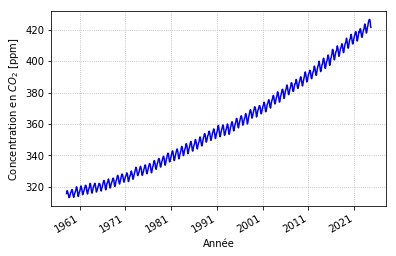

In [23]:
sorted_data['CO2'] = sorted_data['CO2'].astype(float)
sorted_data['CO2'].plot(color='blue')
plt.ylabel(r'Concentration en $CO_2$ [ppm]')
plt.xlabel('Année')
plt.grid(linestyle=':')


On observe deux phénomène couplés : une oscillation périodique annuelle et une contribution plus lente. On essaye de fitter cette contribution plus lente par une exponentielle croissante, selon $$[CO_2] = a \cdot \exp\left(b \cdot t \right) + c$$

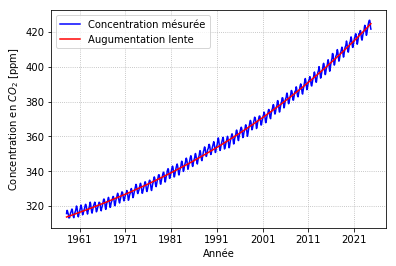

Parametres fittés: a = 55.02, b = 0.0166, c = 258.55


In [24]:
import numpy as np
from scipy.optimize import curve_fit

def exponential_func(t, a, b, c):
    return a * np.exp(b * t) + c

start_year = sorted_data.index.min().year
sorted_data["period_fractional"] = (sorted_data.index.year - start_year) + (sorted_data.index.month - 1) / 12
initial_guess = [1, 0.03, 300]
popt, pcov = curve_fit(exponential_func, sorted_data["period_fractional"], sorted_data["CO2"], p0=initial_guess)
fitted_values = exponential_func(sorted_data["period_fractional"], *popt)
plt.plot(sorted_data.index, sorted_data['CO2'], color='blue', label='Concentration mésurée')
plt.plot(sorted_data.index, fitted_values, color='red', label='Augumentation lente')
plt.legend()
plt.ylabel(r"Concentration en $CO_2$ [ppm]")
plt.xlabel("Année")
plt.grid(linestyle=":")
plt.show()
print(f"Parametres fittés: a = {popt[0]:.2f}, b = {popt[1]:.4f}, c = {popt[2]:.2f}")
